In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
     

In [3]:
flights=pd.read_csv('/kaggle/input/flight-delays/flights.csv')
flights=flights.sample(n=100000)
flights.head()
     

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
346826,2015,1,23,5,DL,2021,N366NW,DTW,PHX,1559,...,1746.0,-49.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
686806,2015,2,15,7,MQ,3470,N658MQ,ORD,CMH,1215,...,1617.0,106.0,0,0,NaN,22.0,0.0,0.0,52.0,32.0
2987310,2015,7,7,2,F9,296,N912FR,DEN,TPA,700,...,1234.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
314468,2015,1,21,3,UA,311,N841UA,MSY,IAH,1525,...,1637.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5255145,2015,11,25,3,MQ,3378,N931MQ,DFW,ROW,1035,...,1108.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(100000, 31)

In [5]:
flights.isnull().values.any()

True

In [6]:
#Checking how many null values are there in each columns
flights.isnull().sum()
     

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              244
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1466
DEPARTURE_DELAY         1466
TAXI_OUT                1519
WHEELS_OFF              1519
SCHEDULED_TIME             0
ELAPSED_TIME            1806
AIR_TIME                1806
DISTANCE                   0
WHEELS_ON               1564
TAXI_IN                 1564
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1564
ARRIVAL_DELAY           1806
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98472
AIR_SYSTEM_DELAY       81666
SECURITY_DELAY         81666
AIRLINE_DELAY          81666
LATE_AIRCRAFT_DELAY    81666
WEATHER_DELAY          81666
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

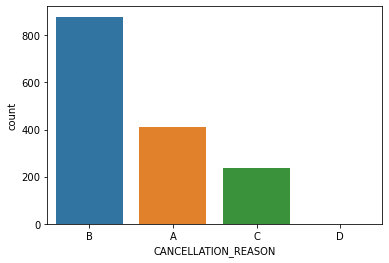

In [7]:
sns.countplot(x='CANCELLATION_REASON',data=flights)
     

<AxesSubplot:xlabel='MONTH', ylabel='count'>

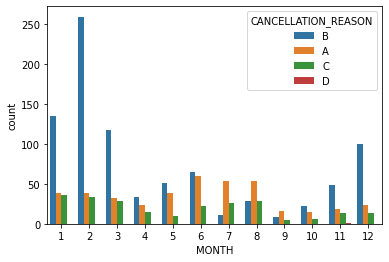

In [8]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

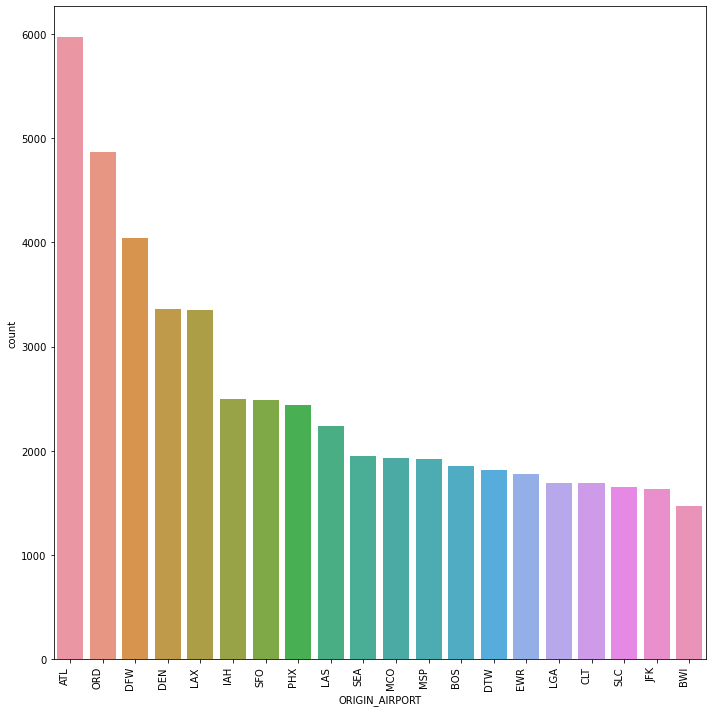

In [9]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()
     


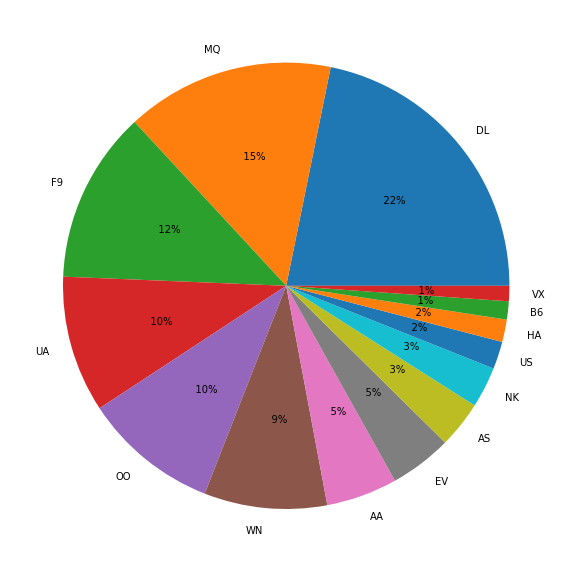

In [10]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()
     


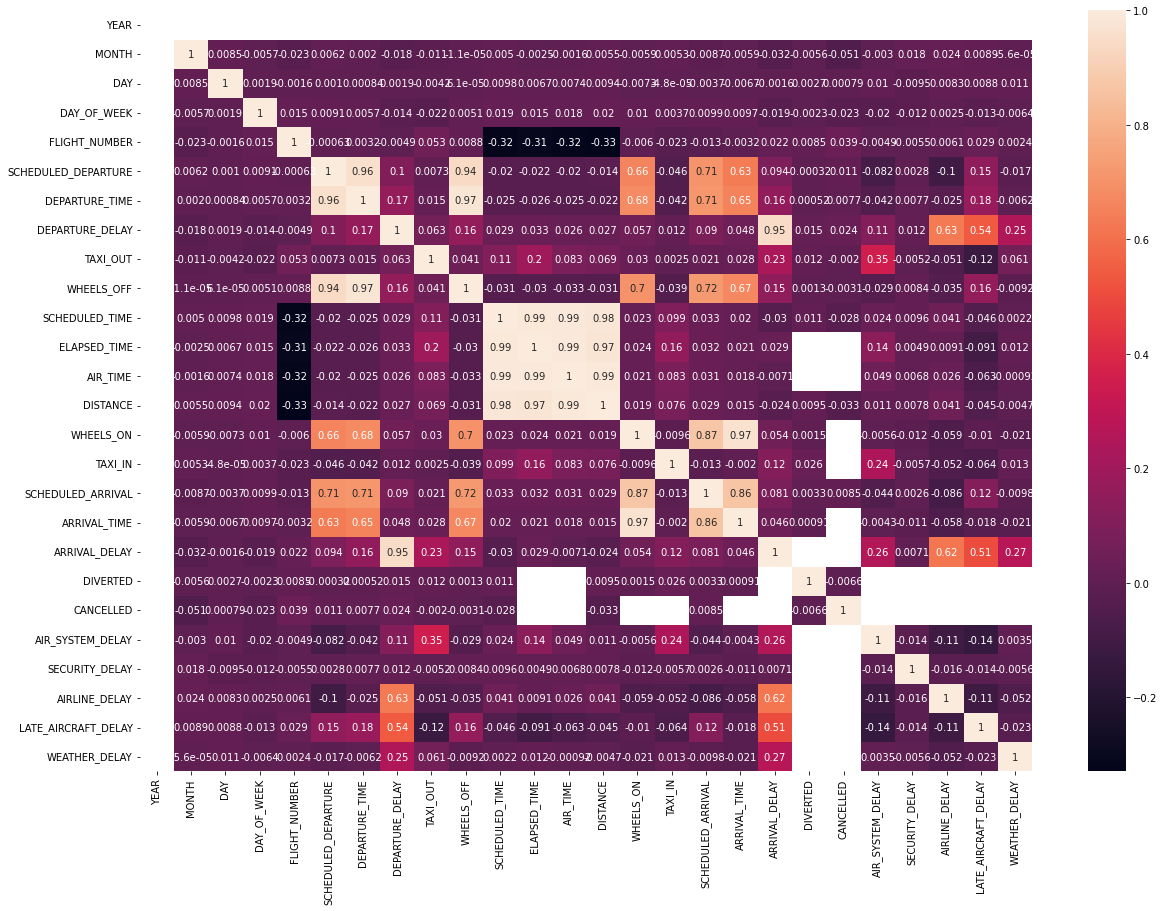

In [11]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

In [12]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008461,-0.005659,-0.022949,0.006194,0.002023,-0.018387,-0.011266,-0.000011,...,-0.008688,-0.005899,-0.031775,-0.005606,-0.051385,-0.002963,0.017697,0.023637,0.008941,-0.000056
DAY,NaN,0.008461,1.000000,0.001858,-0.001635,0.001015,0.000844,0.001892,-0.004187,0.000061,...,-0.003661,-0.006713,-0.001579,0.002744,0.000794,0.010053,-0.009484,0.008348,0.008767,0.011311
DAY_OF_WEEK,NaN,-0.005659,0.001858,1.000000,0.015273,0.009123,0.005717,-0.013623,-0.021797,0.005092,...,0.009889,0.009743,-0.018881,-0.002330,-0.022620,-0.019623,-0.011615,0.002470,-0.013486,-0.006450
FLIGHT_NUMBER,NaN,-0.022949,-0.001635,0.015273,1.000000,-0.000632,0.003210,-0.004942,0.053296,0.008847,...,-0.013024,-0.003229,0.021541,0.008530,0.038687,-0.004907,-0.005505,0.006089,0.028897,0.002441
SCHEDULED_DEPARTURE,NaN,0.006194,0.001015,0.009123,-0.000632,1.000000,0.963339,0.103540,0.007295,0.940492,...,0.709146,0.632655,0.093792,-0.000317,0.011129,-0.081520,0.002765,-0.103372,0.152609,-0.016969
DEPARTURE_TIME,NaN,0.002023,0.000844,0.005717,0.003210,0.963339,1.000000,0.166923,0.015113,0.974791,...,0.711903,0.652416,0.155354,0.000520,0.007730,-0.041849,0.007706,-0.025284,0.177444,-0.006168
DEPARTURE_DELAY,NaN,-0.018387,0.001892,-0.013623,-0.004942,0.103540,0.166923,1.000000,0.063156,0.158866,...,0.090275,0.047898,0.946622,0.015031,0.024335,0.113695,0.011802,0.629987,0.538659,0.249687
TAXI_OUT,NaN,-0.011266,-0.004187,-0.021797,0.053296,0.007295,0.015113,0.063156,1.000000,0.040736,...,0.021272,0.027887,0.227449,0.011721,-0.001964,0.353189,-0.005183,-0.051053,-0.122774,0.060545
WHEELS_OFF,NaN,-0.000011,0.000061,0.005092,0.008847,0.940492,0.974791,0.158866,0.040736,1.000000,...,0.721634,0.670384,0.152121,0.001304,-0.003094,-0.028842,0.008355,-0.035331,0.158922,-0.009179


In [13]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns
     

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [15]:
airport = pd.read_csv('/kaggle/input/flight-delays/airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [16]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
346826,1,23,5,DL,DTW,PHX,1559,-6.0,1671,-49.0
686806,2,15,7,MQ,ORD,CMH,1215,84.0,296,106.0
2987310,7,7,2,F9,DEN,TPA,700,16.0,1506,12.0
314468,1,21,3,UA,MSY,IAH,1525,-7.0,305,-8.0
5255145,11,25,3,MQ,DFW,ROW,1035,-4.0,435,-4.0
...,...,...,...,...,...,...,...,...,...,...
809629,2,23,1,UA,ORD,IAH,956,23.0,925,22.0
3742291,8,20,4,AA,DEN,DFW,1920,86.0,641,77.0
5412041,12,5,6,MQ,GRK,DFW,1510,-7.0,134,-11.0
2803329,6,25,4,WN,OAK,BUR,1825,1.0,325,0.0


In [17]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())
  

flights=flights.dropna()
flights
     


321
321
14


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
346826,1,23,5,DL,DTW,PHX,1559,-6.0,1671,-49.0
686806,2,15,7,MQ,ORD,CMH,1215,84.0,296,106.0
2987310,7,7,2,F9,DEN,TPA,700,16.0,1506,12.0
314468,1,21,3,UA,MSY,IAH,1525,-7.0,305,-8.0
5255145,11,25,3,MQ,DFW,ROW,1035,-4.0,435,-4.0
...,...,...,...,...,...,...,...,...,...,...
809629,2,23,1,UA,ORD,IAH,956,23.0,925,22.0
3742291,8,20,4,AA,DEN,DFW,1920,86.0,641,77.0
5412041,12,5,6,MQ,GRK,DFW,1510,-7.0,134,-11.0
2803329,6,25,4,WN,OAK,BUR,1825,1.0,325,0.0


In [18]:
flights.shape

(98194, 10)

In [19]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
346826,1,23,THURSDAY,DL,DTW,PHX,1559,-6.0,1671,-49.0
686806,2,15,SATURDAY,MQ,ORD,CMH,1215,84.0,296,106.0
2987310,7,7,MONDAY,F9,DEN,TPA,700,16.0,1506,12.0
314468,1,21,TUESDAY,UA,MSY,IAH,1525,-7.0,305,-8.0
5255145,11,25,TUESDAY,MQ,DFW,ROW,1035,-4.0,435,-4.0
...,...,...,...,...,...,...,...,...,...,...
809629,2,23,SUNDAY,UA,ORD,IAH,956,23.0,925,22.0
3742291,8,20,WEDNESDAY,AA,DEN,DFW,1920,86.0,641,77.0
5412041,12,5,FRIDAY,MQ,GRK,DFW,1510,-7.0,134,-11.0
2803329,6,25,WEDNESDAY,WN,OAK,BUR,1825,1.0,325,0.0


In [20]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat
     

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
346826,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
686806,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2987310,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
314468,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5255145,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809629,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3742291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5412041,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=658)

In [22]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
346826,1,23,1559,-6.0,1671,-49.0
686806,2,15,1215,84.0,296,106.0
2987310,7,7,700,16.0,1506,12.0
314468,1,21,1525,-7.0,305,-8.0
5255145,11,25,1035,-4.0,435,-4.0
...,...,...,...,...,...,...
809629,2,23,956,23.0,925,22.0
3742291,8,20,1920,86.0,641,77.0
5412041,12,5,1510,-7.0,134,-11.0
2803329,6,25,1825,1.0,325,0.0


In [23]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
346826,1,23,1559,-6.0,1671,-49.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
686806,2,15,1215,84.0,296,106.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2987310,7,7,700,16.0,1506,12.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
314468,1,21,1525,-7.0,305,-8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5255145,11,25,1035,-4.0,435,-4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809629,2,23,956,23.0,925,22.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3742291,8,20,1920,86.0,641,77.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5412041,12,5,1510,-7.0,134,-11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803329,6,25,1825,1.0,325,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
500752,2,3,659,-9.0,852,-9.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2798612,6,25,1350,-7.0,811,-7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
632738,2,11,1815,7.0,731,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
643014,2,12,1240,1.0,308,-6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1131854,3,15,1235,73.0,2475,100.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033355,3,9,1140,-4.0,1046,-21.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5160512,11,19,810,-6.0,448,-17.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3868677,8,28,1536,14.0,1589,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
304657,1,21,5,67.0,1235,49.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
     

X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY
     

X
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
500752,2,3,659,852,-9.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2798612,6,25,1350,811,-7.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
632738,2,11,1815,731,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
643014,2,12,1240,308,-6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1131854,3,15,1235,2475,100.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033355,3,9,1140,1046,-21.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5160512,11,19,810,448,-17.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3868677,8,28,1536,1589,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
304657,1,21,5,1235,49.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
Y

500752     -9.0
2798612    -7.0
632738      7.0
643014      1.0
1131854    73.0
           ... 
1033355    -4.0
5160512    -6.0
3868677    14.0
304657     67.0
3168844     4.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
     


     


In [30]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()


In [32]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred = reg_rf.predict(X_test)
     

In [34]:
reg_rf.score(X_train,y_train)


0.9897585774087123